In [1]:
# K-means Clustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Create a toy dataset
num_clusters = 3
actual_num_clusters = 3 
X, y = make_blobs(n_samples = 200, centers = actual_num_clusters, random_state=0)

def plotting(X, y, mu=None):
    plt.figure()
    for i in range(num_clusters):
        x_1 = X[y == i, 0]
        x_2 = X[y == i, 1]

        plt.plot(x_1, x_2, 'o')
    if mu is not None:
        for i in range(num_clusters):
            plt.plot(mu[i][0], mu[i][1], 'o')
    
    plt.show()
    return

def update_cluster_means(membership):
    cluster_mean = []
    for i in range(num_clusters):
        mean = np.mean(X[membership == i], axis=0) 
        cluster_mean.append(mean)
    
    return cluster_mean
    
def update_membership(cluster_mean):
    distances = []
    for i in range(num_clusters):
        distances_ = np.array([np.linalg.norm(x-cluster_mean[i]) for x in X])
        distances_ = np.expand_dims(distances_, axis=1)
        distances.append(distances_)
    distances = np.concatenate(distances, axis=1)
    
    membership = np.argmin(distances, axis=1)
    
    return membership

def K_means(num_iter):
    # Original Cluster
    plotting(X, y)

    # Initialize Cluster Center
    membership = np.random.choice(np.arange(num_clusters), size=X.shape[0])
    plotting(X, membership)

    for i in range(num_iter):
        # Update Cluster Centers
        cluster_mean = update_cluster_means(membership)
        plotting(X, membership, cluster_mean)

        # Update Memberships
        membership = update_membership(cluster_mean)
        
    return membership, cluster_mean







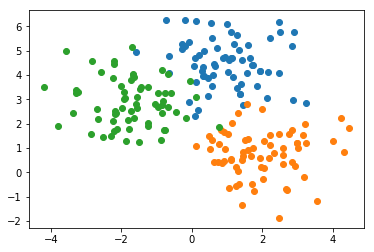

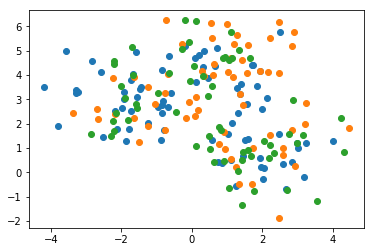

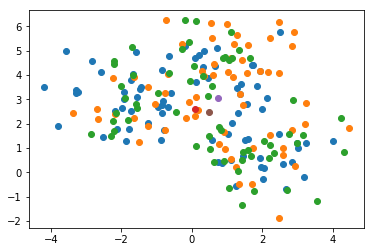

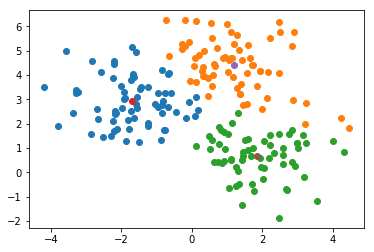

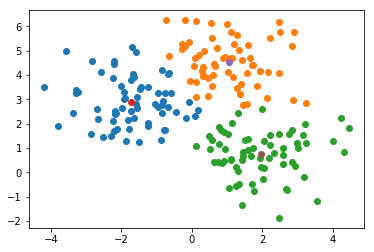

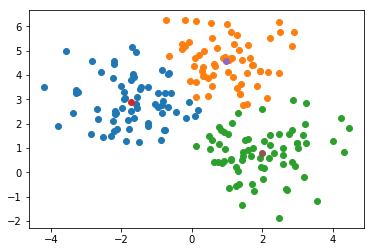

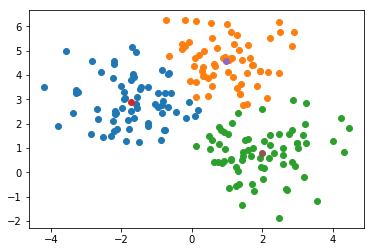

(array([0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2,
        1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0,
        2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
        1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2,
        1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2,
        2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0,
        1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0,
        2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
        1, 2]),
 [array([-1.71656153,  2.91261167]),
  array([0.97692125, 4.56883102]),
  array([1.98410174, 0.81302038])])

In [2]:
K_means(5)